In [1]:
import requests
import json
import xarray as xr
import datetime
from ipywidgets import interact, widgets, interactive
from IPython.display import display
import pandas as pd
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
ICES_body = {
        "query_parameters": [
            {
                "column_name": "WindSpeed",
                "alias": "WindSpeed"
            },
            {
                "column_name": "BotTemp",
                "alias": "BotTemp"
            },
            {
                "column_name": "Depth",
                "alias": "Depth"
            },
            {
                "column_name": "Distance",
                "alias": "Distance"
            },
            {
                "column_name": "WindDir",
                "alias": "WindDir"
            },
            {
                "column_name": "Ship",
                "alias": "Ship"
            },
            {
                "column_name": "Turbidity",
                "alias": "Turbidity"
            },
            {
                "column_name": "SwellHeight",
                "alias": "SwellHeight"
            },
            {
                "column_name": "ShootLat",
                "alias": "LATITUDE"
            },
            {
                "column_name": "ShootLong",
                "alias": "LONGITUDE"
            },
            {
                "column_name": "Year",
                "alias": "Year"
            },
            {
                "column_name": "Month",
                "alias": "Month"
            },
            {
                "column_name": 'Day',
                "alias": 'Day'
            },
            {
                "column_name": "DataType",
                "alias": "DataType"
            },
            {
                "column_name": "DateofCalculation",
                "alias": "DateofCalculation"
            },
            {
                "column_name": "Country",
                "alias": "Country"
            },
            {
                "column_name": "HaulDur",
                "alias": "HaulDur"
            },
            {
                "column_name": "GroundSpeed",
                "alias": "GroundSpeed"
            },
            {
                "column_name": "Gear",
                "alias": "Gear"
            },
            {
                "column_name": "DoorWgt",
                "alias": "DoorWgt"
            },
            {
                "column_name": "GearEx",
                "alias": "GearEx"
            },
            {
                "column_name": "DoorType",
                "alias": "DoorType"
            },
            {
                "column_name": "DoorSpread",
                "alias": "DoorSpread"
            },
            {
                "column_name": "DoorSurface",
                "alias": "DoorSurface"
            },
            {
                "column_name": "DepthStratum",
                "alias": "DepthStratum"
            },
            {
                "column_name": "DayNight",
                "alias": "DayNight"
            },
            {
                "column_name": "CodendMesh",
                "alias": "CodendMesh"
            },
            {
                "column_name": "Buoyancy",
                "alias": "Buoyancy"
            },
            {
                "column_name": 'BySpecRecCode',
                "alias": 'BySpecRecCode'
            },
            {
                "column_name": "BotSal",
                "alias": "BotSal"
            },
            {
                "column_name": "BotCurSpeed",
                "alias": "BotCurSpeed"
            },
            {
                "column_name": "BotCurDir",
                "alias": "BotCurDir"
            },
            {
                "column_name": "HaulLat",
                "alias": "HaulLat"
            },
            {
                "column_name": "HaulLong",
                "alias": "HaulLong"
            },
            {
                "column_name": "HaulNo",
                "alias": "HaulNo"
            },
            {
                "column_name": "HaulVal",
                "alias": "HaulVal"
            },
            {
                "column_name": "HydroStNo",
                "alias": "HydroStNo"
            },
            {
                "column_name": "KiteDim",
                "alias": "KiteDim"
            },
            {
                "column_name": "MaxTrawlDepth",
                "alias": "MaxTrawlDepth"
            },
            {
                "column_name": "MinTrawlDepth",
                "alias": "MinTrawlDepth"
            },
            {
                "column_name": "Netopening",
                "alias": "Netopening"
            },
            {
                "column_name": "PelSampType",
                "alias": "PelSampType"
            },
            {
                "column_name": "Quarter",
                "alias": "Quarter"
            },
            {
                "column_name": "RecordType",
                "alias": "RecordType"
            },
            {
                "column_name": "Rigging",
                "alias": "Rigging"
            },
            {
                "column_name": "SecchiDepth",
                "alias": "SecchiDepth"
            },
            {
                "column_name": "SpeedWater",
                "alias": "SpeedWater"
            },
            {
                "column_name": "StNo",
                "alias": "StNo"
            },
            {
                "column_name": "StatRec",
                "alias": "StatRec"
            },
            {
                "column_name": "StdSpecRecCode",
                "alias": "StdSpecRecCode"
            },
            {
                "column_name": "SurCurDir",
                "alias": "SurCurDir"
            },
            {
                "column_name": "SurCurSpeed",
                "alias": "SurCurSpeed"
            },
            {
                "column_name": "SurSal",
                "alias": "SurSal"
            },
            {
                "column_name": "SurTemp",
                "alias": "SurTemp"
            },
            {
                "column_name": "Survey",
                "alias": "Survey"
            },
            {
                "column_name": "TowDir",
                "alias": "TowDir"
            },
            {
                "column_name": "WarpDen",
                "alias": "WarpDen"
            },
            {
                "column_name": "Warpdia",
                "alias": "Warpdia"
            },
            {
                "column_name": "TideSpeed",
                "alias": "TideSpeed"
            },
            {
                "column_name": "TimeShot",
                "alias": "TimeShot"
            },
            {
                "column_name": "Tickler",
                "alias": "Tickler"
            },
            {
                "column_name": "TidePhase",
                "alias": "TidePhase"
            },
            {
                "column_name": "SwellDir",
                "alias": "SwellDir"
            },
            {
                "column_name": "ThermoCline",
                "alias": "ThermoCline"
            },
            {
                "column_name": "SurveyIndexArea",
                "alias": "SurveyIndexArea"
            },
            {
                "column_name": "SweepLngt",
                "alias": "SweepLngt"
            },
            {
                "column_name": "ThClineDepth",
                "alias": "ThClineDepth"
            },
            {
                "column_name": "Warplngt",
                "alias": "Warplngt"
            },
            {
                "column_name": "WgtGroundRope",
                "alias": "WgtGroundRope"
            },
            {
                "column_name": "WingSpread",
                "alias": "WingSpread"
            }],
            "filters": [
            {
              "for_query_parameter": "LONGITUDE",
              "min": -2,
              "max": 9
            },
            {
              "for_query_parameter": "LATITUDE",
              "min": 50,
              "max": 58
            }
            ],
            "output": {
                "format": "csv"
        }}


In [3]:
ICES_response = requests.post("https://beacon-poc-ices.maris.nl/api/query", json.dumps(ICES_body), headers = {
    'Content-type': 'application/json'
})
open('./ICES.csv', 'wb').write(ICES_response.content)
df_ICES = pd.read_csv('ICES.csv', low_memory=False)
df_ICES

,WindSpeed,BotTemp,Depth,Distance,WindDir,Ship,Turbidity,SwellHeight,LATITUDE,LONGITUDE,Year,Month,Day,DataType,DateofCalculation,Country,HaulDur,GroundSpeed,Gear,DoorWgt,GearEx,DoorType,DoorSpread,DoorSurface,DepthStratum,DayNight,CodendMesh,Buoyancy,BySpecRecCode,BotSal,BotCurSpeed,BotCurDir,HaulLat,HaulLong,HaulNo,HaulVal,HydroStNo,KiteDim,MaxTrawlDepth,MinTrawlDepth,Netopening,PelSampType,Quarter,RecordType,Rigging,SecchiDepth,SpeedWater,StNo,StatRec,StdSpecRecCode,SurCurDir,SurCurSpeed,SurSal,SurTemp,Survey,TowDir,WarpDen,Warpdia,TideSpeed,TimeShot,Tickler,TidePhase,SwellDir,ThermoCline,SurveyIndexArea,SweepLngt,ThClineDepth,Warplngt,WgtGroundRope,WingSpread,dataset_id
0,-9,-9.0,-9,-9,-9,64WB,-9,-9.0,53.5500,3.2000,1965,3,30,C,-9,NL,60,-9.0,DHT,-9,-9,-9,-9.0,-9.0,-9,D,-9,-9,1,-9.00,-9.0,-9,-9.0000,-9.0000,1,V,99999999,-9.0,-9,-9,-9.0,-9,1,HH,-9,-9,-9.0,1,36F3,1,-9,-9.0,-9.00,-9.0,NS-IBTS,-9,-9,-9,-9,700,-9,-9,-9,-9,-9,45,-9,-9,-9,-9.0,7
1,-9,-9.0,67,-9,-9,64WB,-9,-9.0,56.0500,3.5833,1965,3,31,C,-9,NL,60,-9.0,DHT,-9,-9,-9,-9.0,-9.0,-9,D,-9,-9,1,-9.00,-9.0,-9,-9.0000,-9.0000,6,V,99999999,-9.0,-9,-9,-9.0,-9,1,HH,-9,-9,-9.0,6,41F3,1,-9,-9.0,-9.00,-9.0,NS-IBTS,-9,-9,-9,-9,1045,-9,-9,-9,-9,-9,45,-9,-9,-9,-9.0,7
2,-9,-9.0,-9,-9,-9,64WB,-9,-9.0,56.0500,4.1000,1965,3,31,C,-9,NL,60,-9.0,DHT,-9,-9,-9,-9.0,-9.0,-9,D,-9,-9,1,-9.00,-9.0,-9,-9.0000,-9.0000,7,V,99999999,-9.0,-9,-9,-9.0,-9,1,HH,-9,-9,-9.0,7,41F4,1,-9,-9.0,-9.00,-9.0,NS-IBTS,-9,-9,-9,-9,1415,-9,-9,-9,-9,-9,45,-9,-9,-9,-9.0,7
3,-9,-9.0,-9,-9,-9,64WB,-9,-9.0,53.7833,3.3333,1965,3,30,C,-9,NL,60,-9.0,DHT,-9,-9,-9,-9.0,-9.0,-9,D,-9,-9,1,-9.00,-9.0,-9,-9.0000,-9.0000,2,V,99999999,-9.0,-9,-9,-9.0,-9,1,HH,-9,-9,-9.0,2,36F3,1,-9,-9.0,-9.00,-9.0,NS-IBTS,-9,-9,-9,-9,1045,-9,-9,-9,-9,-9,45,-9,-9,-9,-9.0,7
4,-9,-9.0,-9,-9,-9,64WB,-9,-9.0,54.0333,3.4500,1965,3,30,C,-9,NL,60,-9.0,DHT,-9,-9,-9,-9.0,-9.0,-9,D,-9,-9,1,-9.00,-9.0,-9,-9.0000,-9.0000,3,V,99999999,-9.0,-9,-9,-9.0,-9,1,HH,-9,-9,-9.0,3,37F3,1,-9,-9.0,-9.00,-9.0,NS-IBTS,-9,-9,-9,-9,1415,-9,-9,-9,-9,-9,45,-9,-9,-9,-9.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4533,7,7.1,36,3269,225,64T2,-9,1.0,55.2635,2.6026,2024,1,30,R,20240528,NL,30,-9.0,GOV,1200,-9,P,60.0,4.5,-9,D,20,180,1,34.75,-9.0,-9,55.2850,2.5681,8,V,39F208,0.8,-9,-9,6.4,-9,1,HH,-9,-9,-9.0,39F208,39F2,1,-9,-9.0,34.75,7.2,NS-IBTS,314,-9,-9,0,1042,-9,-9,-9,-9,-9,60,-9,200,210,-9.0,1
4534,12,7.2,55,3599,225,64T2,-9,1.5,55.6475,2.8103,2024,1,30,R,20240528,NL,30,-9.0,GOV,1200,-9,P,70.0,4.5,-9,D,20,180,1,34.90,-9.0,-9,55.6308,2.8598,9,V,40F209,0.8,-9,-9,5.6,-9,1,HH,-9,-9,-9.0,40F209,40F2,1,-9,-9.0,34.87,7.2,NS-IBTS,123,-9,-9,-9,1333,-9,-9,-9,-9,-9,60,-9,320,210,-9.0,1
4535,12,6.9,53,3597,315,64T2,-9,2.0,55.7656,3.3436,2024,1,30,R,20240528,NL,30,-9.0,GOV,1200,-9,P,68.0,4.5,-9,D,20,180,1,34.87,-9.0,-9,55.7421,3.3833,10,V,40F310,0.8,-9,-9,6.8,-9,1,HH,-9,-9,-9.0,40F310,40F3,1,-9,-9.0,34.87,6.9,NS-IBTS,138,-9,-9,0,1555,-9,-9,-9,-9,-9,60,-9,305,210,-9.0,1
4536,9,6.6,36,3554,315,64T2,-9,1.5,53.9423,5.7145,2024,2,1,R,20240528,NL,30,-9.0,GOV,1200,-9,P,64.0,4.5,-9,D,20,180,1,34.14,-9.0,-9,53.9388,5.7686,11,V,36F511,0.8,-9,-9,5.5,-9,1,HH,-9,-9,-9.0,36F511,36F5,1,-9,-9.0,34.12,6.6,NS-IBTS,94,-9,-9,0,1007,-9,-9,-9,-9,-9,60,-9,210,210,-9.0,1


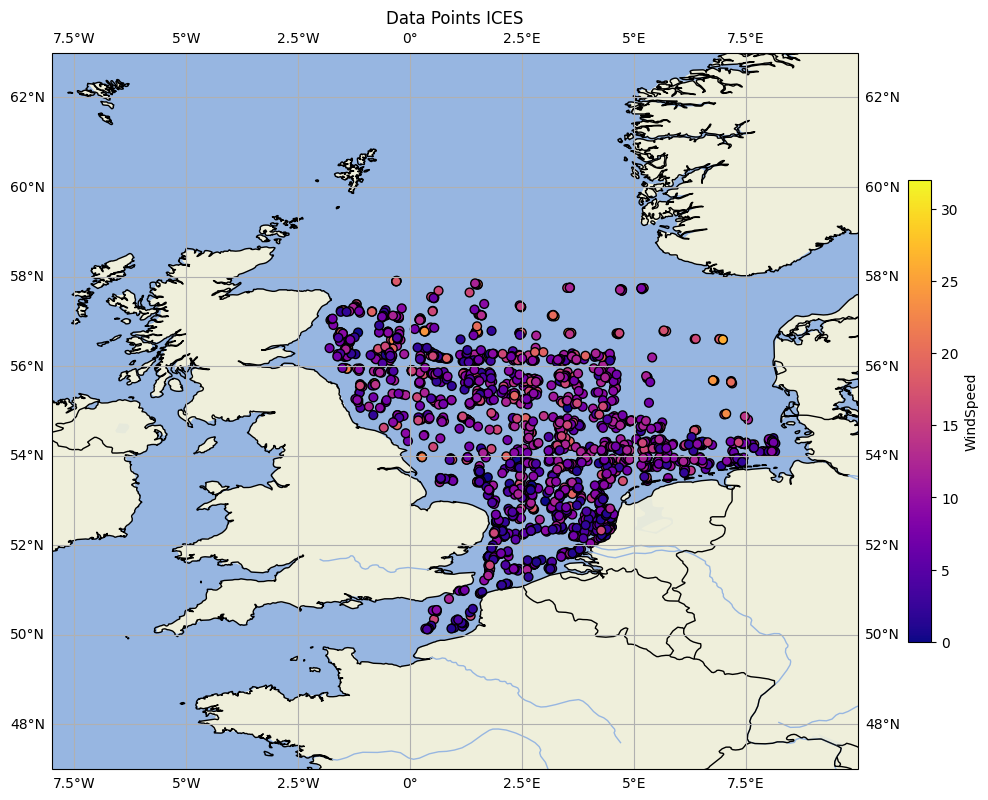

In [4]:
# Create a Cartopy plot
fig = plt.figure(figsize=(13, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the extent (bounding box) for the North Sea region
ax.set_extent([-8, 10, 47, 63], crs=ccrs.PlateCarree())  # (west, east, south, north)

# Add coastlines and gridlines
ax.coastlines(resolution='10m')
ax.gridlines(draw_labels=True)

# Plot data points (latitude and longitude from the DataFrame)
sc = ax.scatter(df_ICES.loc[df_ICES['WindSpeed'] >= 0]['LONGITUDE'], df_ICES.loc[df_ICES['WindSpeed'] >= 0]['LATITUDE'], c=df_ICES.loc[df_ICES['WindSpeed'] >= 0]['WindSpeed'], cmap='plasma', s=40, edgecolor='black', transform=ccrs.PlateCarree())

# Add land and ocean features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS)     # Add rivers with color
ax.add_feature(cfeature.BORDERS)  # Add country borders# # 
ax.add_feature(cfeature.LAKES, alpha=0.1)  # Add lakes with edge color

# Add a color bar to indicate the value scale
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', shrink=0.6, label='Value Set 1')
cbar.set_label('WindSpeed')

# Add a title
plt.title('Data Points ICES')

# Show the plot
plt.show()

In [5]:
RWS_CTD_body = {
        "query_parameters": [
            {
                "column_name": 'numeriekewaarde',
                "alias": 'waarde'
            },
            {
                "column_name": "begindatum",
                "alias": "TIME"
            },
            {
                "column_name": "diepte",
                "alias": "DEPTH"
            },
            {
                "column_name": "diepte_eenheid",
                "alias": "DEPTH unit"
            },
            {
                "column_name": "longitude",
                "alias": "LONGITUDE"
            },
            {
                "column_name": "latitude",
                "alias": "LATITUDE"
            },
            {
                "column_name": "parameteromschrijving",
                "alias": "parameteromschrijving"
            },
            {
                "column_name": "parametercode",
                "alias": "parametercode"
            },
            {
                "column_name": "eenheidcode",
                "alias": "eenheidcode"
            },
            {
                "column_name": "grootheidcode",
                "alias": "grootheidcode"
            },
            {
                "column_name": "typeringcode",
                "alias": "typeringcode"
            },
            {
                "column_name": "FID",
                "alias": "FID"
            },
            {
                "column_name": "diepte_grootheid",
                "alias": "diepte_grootheid"
            },
            {
                "column_name": "druk",
                "alias": "druk"
            },
            {
                "column_name": "druk_eenheid",
                "alias": "druk_eenheid"
            },
            {
                "column_name": "druk_grootheid",
                "alias": "druk_grootheid"
            },
            {
                "column_name": "geom",
                "alias": "geom"
            },
            {
                "column_name": "hoedanigheidcode",
                "alias": "hoedanigheidcode"
            },
            {
                "column_name": "index",
                "alias": "index"
            },
            {
                "column_name": "metadata_index",
                "alias": "metadata_index"
            },
            {
                "column_name": "waardebepalingsmethodecode",
                "alias": "waardebepalingsmethodecode"
            },
            {
                "column_name": "waardebewerkingsmethodecode",
                "alias": "waardebewerkingsmethodecode"
            }],
            "filters": [
            {
              "for_query_parameter": "LONGITUDE",
              "min": 3.946140,
              "max": 5.164450
            },
            {
              "for_query_parameter": "LATITUDE",
              "min": 52.128319,
              "max": 53.239434
            },
            {
              "for_query_parameter": "grootheidcode",
              "eq": "SALNTT"
            }],
            "output": {
                "format": "csv"
        }}

In [6]:
RWS_CTD_response = requests.post("https://beacon-poc-rws-ctd.maris.nl/api/query", json.dumps(RWS_CTD_body), headers = {
    'Content-type': 'application/json'
})
open('./RWS_CTD.csv', 'wb').write(RWS_CTD_response.content)
df_RWS_CTD = pd.read_csv('RWS_CTD.csv')
df_RWS_CTD 

,waarde,TIME,DEPTH,DEPTH unit,LONGITUDE,LATITUDE,parameteromschrijving,parametercode,eenheidcode,grootheidcode,typeringcode,FID,diepte_grootheid,druk,druk_eenheid,druk_grootheid,geom,hoedanigheidcode,index,metadata_index,waardebepalingsmethodecode,waardebewerkingsmethodecode,dataset_id
0,27.565786,1995-02-08T03:12:00.000,3.147,m,4.3025,52.30222,NaN,NVT,g/m3,SALNTT,NaN,ctd_complete.fid--38095bbf_192434a8fe3_-581e,DIEPTE,3.176,Pa,DRUK,POINT (4.3025 52.30222),NaN,1670,12,NaN,NaN,1
1,27.585005,1995-02-08T03:12:00.000,3.147,m,4.3025,52.30222,NaN,NVT,g/m3,SALNTT,NaN,ctd_complete.fid--38095bbf_192434a8fe3_-5817,DIEPTE,3.176,Pa,DRUK,POINT (4.3025 52.30222),NaN,1671,12,NaN,NaN,1
2,27.600349,1995-02-08T03:12:00.000,3.170,m,4.3025,52.30222,NaN,NVT,g/m3,SALNTT,NaN,ctd_complete.fid--38095bbf_192434a8fe3_-580c,DIEPTE,3.199,Pa,DRUK,POINT (4.3025 52.30222),NaN,1672,12,NaN,NaN,1
3,27.615137,1995-02-08T03:12:00.000,3.165,m,4.3025,52.30222,NaN,NVT,g/m3,SALNTT,NaN,ctd_complete.fid--38095bbf_192434a8fe3_-57fe,DIEPTE,3.194,Pa,DRUK,POINT (4.3025 52.30222),NaN,1673,12,NaN,NaN,1
4,27.632748,1995-02-08T03:12:00.000,3.184,m,4.3025,52.30222,NaN,NVT,g/m3,SALNTT,NaN,ctd_complete.fid--38095bbf_192434a8fe3_-57fb,DIEPTE,3.213,Pa,DRUK,POINT (4.3025 52.30222),NaN,1674,12,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874484,31.600400,2019-04-15T12:56:00.000,3.554,m,4.1750,52.34167,NaN,NVT,g/m3,SALNTT,NaN,ctd_complete.fid--38095bbf_192435a1107_-173d,DIEPTE,3.585,Pa,DRUK,POINT (4.175 52.34167),NaN,2391818,3257,NaN,NaN,1
874485,31.601100,2019-04-15T12:56:00.000,3.536,m,4.1750,52.34167,NaN,NVT,g/m3,SALNTT,NaN,ctd_complete.fid--38095bbf_192435a1107_-172b,DIEPTE,3.568,Pa,DRUK,POINT (4.175 52.34167),NaN,2391819,3257,NaN,NaN,1
874486,31.564900,2019-04-15T12:56:00.000,3.536,m,4.1750,52.34167,NaN,NVT,g/m3,SALNTT,NaN,ctd_complete.fid--38095bbf_192435a1107_-1728,DIEPTE,3.568,Pa,DRUK,POINT (4.175 52.34167),NaN,2391819,3257,NaN,NaN,1
874487,31.602400,2019-04-15T12:56:00.000,3.575,m,4.1750,52.34167,NaN,NVT,g/m3,SALNTT,NaN,ctd_complete.fid--38095bbf_192435a1107_-1723,DIEPTE,3.607,Pa,DRUK,POINT (4.175 52.34167),NaN,2391820,3257,NaN,NaN,1


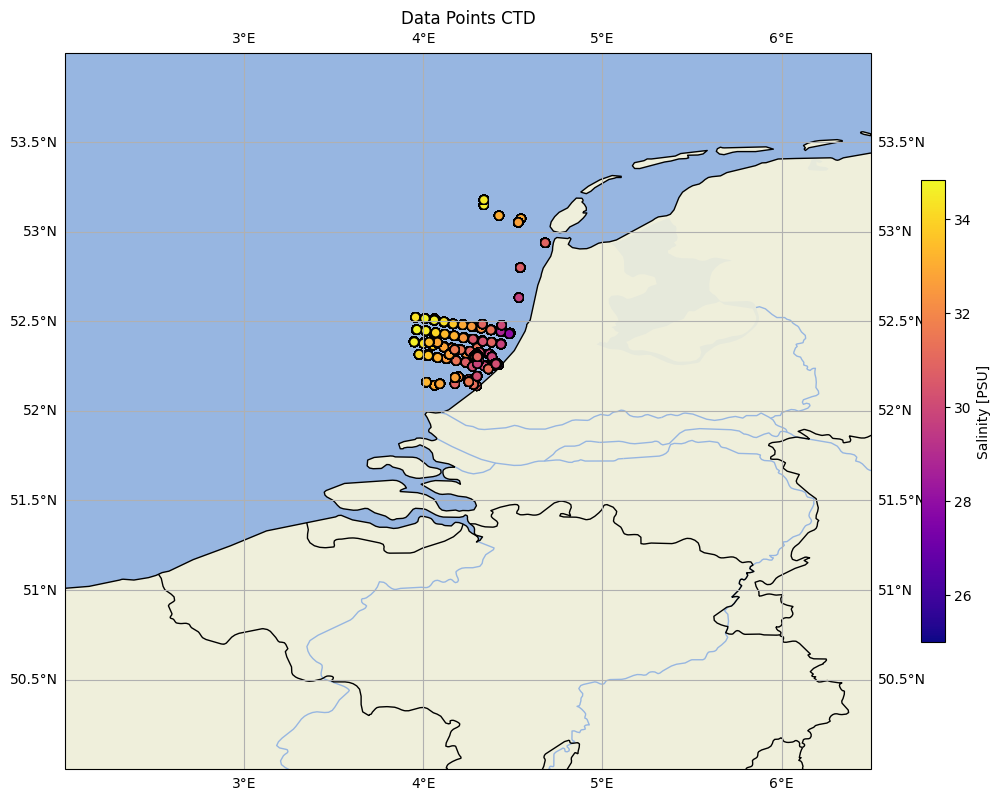

In [7]:
# Create a Cartopy plot
fig = plt.figure(figsize=(13, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the extent (bounding box) for the North Sea region
ax.set_extent([2, 6.5, 50, 54], crs=ccrs.PlateCarree())  # (west, east, south, north)

# Add coastlines and gridlines
ax.coastlines(resolution='10m')
ax.gridlines(draw_labels=True)

# Plot data points (latitude and longitude from the DataFrame)
sc = ax.scatter(df_RWS_CTD.loc[(df_RWS_CTD['waarde'] < 40) & (df_RWS_CTD['waarde'] > 25)]['LONGITUDE'], df_RWS_CTD.loc[(df_RWS_CTD['waarde'] < 40) & (df_RWS_CTD['waarde'] > 25)]['LATITUDE'], c=df_RWS_CTD.loc[(df_RWS_CTD['waarde'] < 40) & (df_RWS_CTD['waarde'] > 25)]['waarde'], cmap='plasma', s=40, edgecolor='black', transform=ccrs.PlateCarree())

# Add land and ocean features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS)     # Add rivers with color
ax.add_feature(cfeature.BORDERS)  # Add country borders# # 
ax.add_feature(cfeature.LAKES, alpha=0.1)  # Add lakes with edge color

# Add a color bar to indicate the value scale
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', shrink=0.6, label='Value Set 1')
cbar.set_label('Salinity [PSU]')

# Add a title
plt.title('Data Points CTD')

# Show the plot
plt.show()

In [8]:
RWS_WADAR_beta_body = {
        "query_parameters": [
            {
                "column_name": 'Loc.Code',
                "alias": 'Loc.Code'
            },
            {
                "column_name": "Locatie",
                "alias": "Locatie"
            },
            {
                "column_name": "Waarde_Numeriek",
                "alias": "Waarde_Numeriek"
            },
            {
                "column_name": "Tijdstip",
                "alias": "Tijdstip"
            },
            {
                "column_name": "Meta.Compartiment.Code",
                "alias": "Meta.Compartiment.Code"
            },
            {
                "column_name": "Meta.Eenheid",
                "alias": "Meta.Eenheid"
            },
            {
                "column_name": "Loc.Lon",
                "alias": "LONGITUDE"
            },
            {
                "column_name": "Loc.Lat",
                "alias": "LATITUDE"
            },
            {
                "column_name": "Meta.Grootheid.Code",
                "alias": "Meta.Grootheid.Code"
            },
            {
                "column_name": "Meta.Grootheid.Oms",
                "alias": "Meta.Grootheid.Oms"
            },
            {
                "column_name": "Meta.Parameter.Code",
                "alias": "Meta.Parameter.Code"
            }],
            "filters": [
            {
              "for_query_parameter": "LONGITUDE",
              "min": 2.5,
              "max": 4.5
            },
            {
              "for_query_parameter": "LATITUDE",
              "min": 52,
              "max": 54.5
            },
            {
              "for_query_parameter": "Meta.Compartiment.Code",
              "eq": "OW"
            },
            {
              "for_query_parameter": "Meta.Grootheid.Code",
              "eq": "T"
            }],
            "output": {
                "format": "csv"
        }}

In [9]:
RWS_WADAR_beta_response = requests.post("https://beacon-poc-wadar.maris.nl/api/query", json.dumps(RWS_WADAR_beta_body), headers = {
    'Content-type': 'application/json'
})
open('./RWS_WADAR_beta.csv', 'wb').write(RWS_WADAR_beta_response.content)
df_RWS_WADAR_beta = pd.read_csv('RWS_WADAR_beta.csv', low_memory = False)
df_RWS_WADAR_beta.set_index('Tijdstip', inplace=True)
df_RWS_WADAR_beta = df_RWS_WADAR_beta.sort_index()
df_RWS_WADAR_beta.index = pd.to_datetime(df_RWS_WADAR_beta.index)
df_RWS_WADAR_beta 

,Loc.Code,Locatie,Waarde_Numeriek,Meta.Compartiment.Code,Meta.Eenheid,LONGITUDE,LATITUDE,Meta.Grootheid.Code,Meta.Grootheid.Oms,Meta.Parameter.Code,dataset_id
Tijdstip,,,,,,,,,,,
1970-01-05 11:00:00,ijmuiden,IJmuiden (IJmuiden),0.8,OW,graad Celsius,4.425641,52.539507,T,Temperatuur,NaN,265793
1970-01-19 11:00:00,ijmuiden,IJmuiden (IJmuiden),2.5,OW,graad Celsius,4.425641,52.539507,T,Temperatuur,NaN,265793
1970-02-02 11:00:00,ijmuiden,IJmuiden (IJmuiden),2.1,OW,graad Celsius,4.425641,52.539507,T,Temperatuur,NaN,265793
1970-02-16 11:00:00,ijmuiden,IJmuiden (IJmuiden),3.7,OW,graad Celsius,4.425641,52.539507,T,Temperatuur,NaN,265793
1970-03-02 11:00:00,ijmuiden,IJmuiden (IJmuiden),5.3,OW,graad Celsius,4.425641,52.539507,T,Temperatuur,NaN,265793
...,...,...,...,...,...,...,...,...,...,...,...
2024-06-02 23:40:00,k13a,K13a (platform),13.3,OW,graad Celsius,3.218922,53.217016,T,Temperatuur,NaN,6859
2024-06-02 23:50:00,k13a,K13a (platform),13.3,OW,graad Celsius,3.218922,53.217016,T,Temperatuur,NaN,7329
2024-06-02 23:50:00,k13a,K13a (platform),13.3,OW,graad Celsius,3.218922,53.217016,T,Temperatuur,NaN,6859


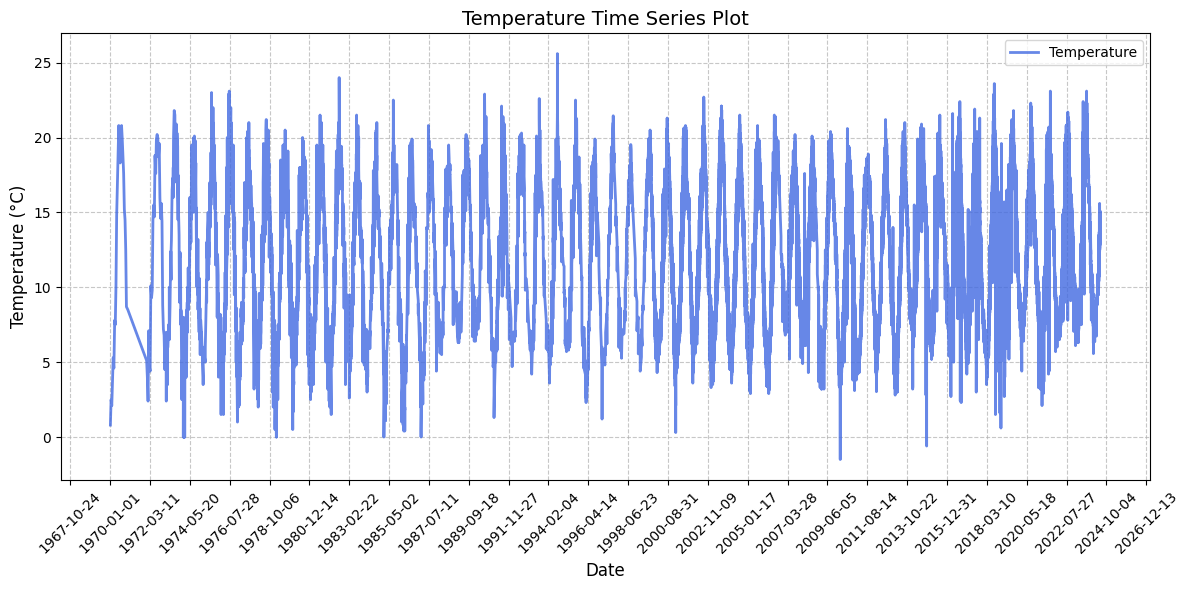

In [10]:
subset_wadar = df_RWS_WADAR_beta.loc[(df_RWS_WADAR_beta['Waarde_Numeriek'] < 30) & (df_RWS_WADAR_beta['Waarde_Numeriek'] > -2)]

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(subset_wadar.index, subset_wadar['Waarde_Numeriek'], color='royalblue', linewidth=2, alpha=0.8, label='Temperature')

ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Temperature (°C)', fontsize=12)
ax.set_title('Temperature Time Series Plot', fontsize=14)

ax.xaxis.set_major_locator(plt.MaxNLocator(28))  
ax.xaxis.set_minor_locator(plt.MaxNLocator(36)) 
plt.xticks(rotation=45)

ax.grid(True, which='both', linestyle='--', alpha=0.7)

ax.legend()

plt.tight_layout()

plt.show()

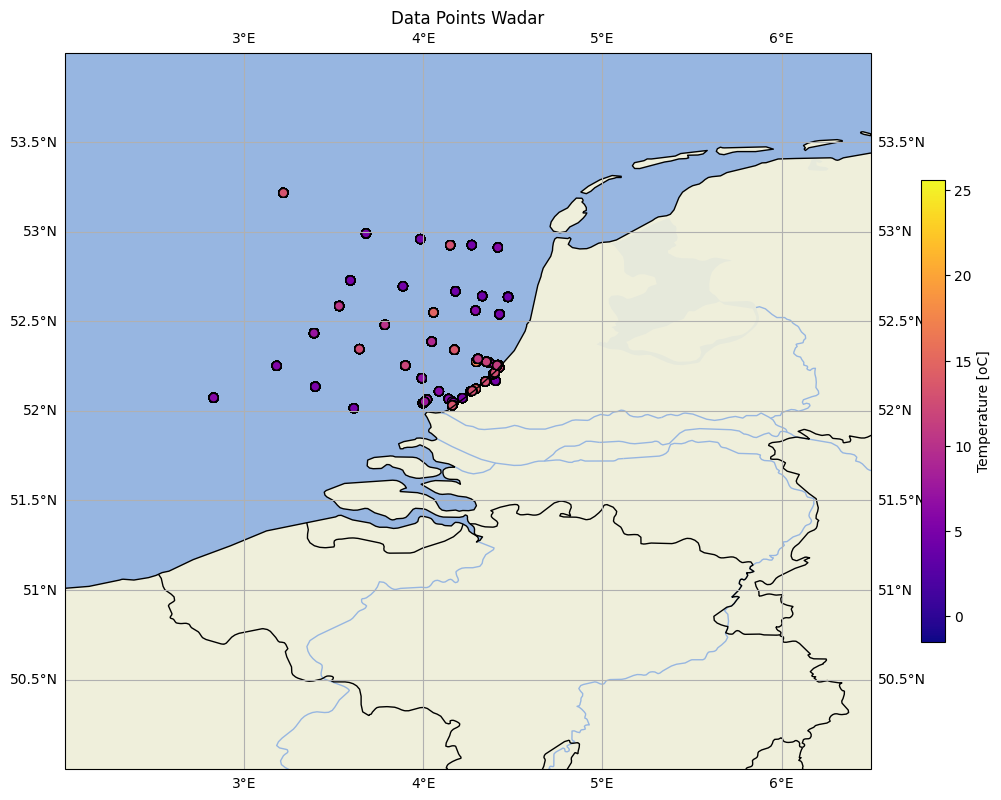

In [11]:
# Create a Cartopy plot
fig = plt.figure(figsize=(13, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the extent (bounding box) for the North Sea region
ax.set_extent([2, 6.5, 50, 54], crs=ccrs.PlateCarree())  # (west, east, south, north)

# Add coastlines and gridlines
ax.coastlines(resolution='10m')
ax.gridlines(draw_labels=True)

# Plot data points (latitude and longitude from the DataFrame)
sc = ax.scatter(subset_wadar['LONGITUDE'], subset_wadar['LATITUDE'], c=subset_wadar['Waarde_Numeriek'], cmap='plasma', s=40, edgecolor='black', transform=ccrs.PlateCarree())

# Add land and ocean features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS)     # Add rivers with color
ax.add_feature(cfeature.BORDERS)  # Add country borders# # 
ax.add_feature(cfeature.LAKES, alpha=0.1)  # Add lakes with edge color

# Add a color bar to indicate the value scale
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', shrink=0.6, label='Value Set 1')
cbar.set_label('Temperature [oC]')

# Add a title
plt.title('Data Points Wadar')

# Show the plot
plt.show()